In [42]:
import matplotlib
import importlib
import ventos.test_trace as tt
import ventos.sim.simple as simple
import pandas as pd, matplotlib.pyplot as plt
from IPython.display import display, HTML
matplotlib.rcParams['figure.figsize'] = [10,7]
pd.set_option('precision', 4)

{'IE': 0.5,
 'PEEP': 5,
 'Pi': 15,
 'cardiac_amplitude': 0.05,
 'end_time': 30,
 'events': [],
 'flow_noise_sd': 0.05,
 'heart_rate': 85,
 'pressure_noise_sd': 1,
 'rate': 10,
 'resistance': 20,
 'time_resolution': 50,
 'title': 'Base'}


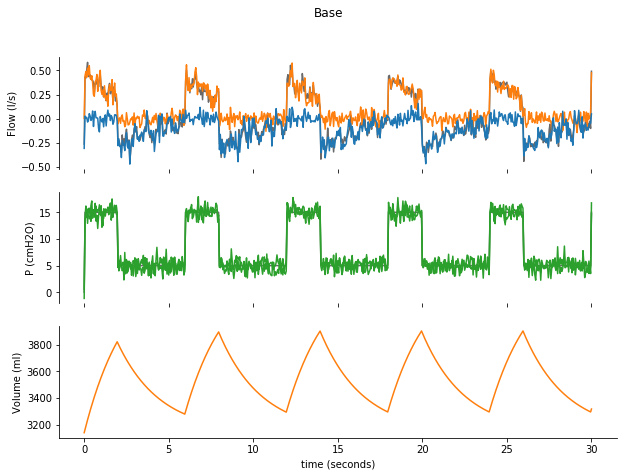

In [43]:
### Testing PIRDS function:
importlib.reload(tt)
importlib.reload(simple)
pdf = tt.run_and_output(tt.base_scenario)        

In [44]:
def not_pirds(df):
    d = df[['time','pressure_1', 'pressure_1', 'flow_i', 'flow_e']].copy()
    d.columns = ['time', 'PI', 'PE', 'FI', 'FE']
    d['FI'] *= simple.litres_per_second_to_ml_per_minute
    d['FE'] *= simple.litres_per_second_to_ml_per_minute
    return d.astype(int)

json = simple.df_to_PIRDS(pdf.head()).to_json(orient="records",lines=True)
csv = simple.df_to_PIRDS(pdf.head()).to_csv(index=False)
not_pirds_csv = not_pirds(pdf.head()).to_csv(index=False)

html = f"""<h1>PIRDS!!!</h1><h2>JSON</h2><pre>{json}</pre><h2>CSV</h2><pre>{csv}</pre>
       <h1>Not PIRDS!!!</h1><pre>{not_pirds_csv}</pre>"""

display(HTML(html))

In [37]:
not_pirds_csv

'time,PI,PE,FI,FE\n0,0,0,3826,-12218\n50,14,14,34137,3543\n100,12,12,37162,1602\n150,15,15,31104,1508\n200,16,16,33163,456\n'

In [21]:
pdf.head()

,time,pressure_mouth,pressure_alveolus,pressure_intrapleural,lung_volume,flow,pressure_1,pressure_2,flow_i,flow_e
0,0,0,5.0000,0.3066,3138.5224,-0.1752,-0.6756,-2.0287,0.0638,-0.2036
1,50,15,5.1959,0.4316,3163.5224,0.5356,14.7868,15.9615,0.5690,0.0591
2,100,15,5.3880,0.5531,3188.0326,0.5967,12.3116,14.0020,0.6194,0.0267
3,150,15,5.5763,0.6714,3212.0626,0.5167,15.1820,17.8480,0.5184,0.0251
4,200,15,5.7609,0.7865,3235.6218,0.5065,16.0803,15.1604,0.5527,0.0076


,time,PI,PE,FI,FE
0,0,0,0,3826,-12218
1,50,14,14,34137,3543
2,100,12,12,37162,1602
3,150,15,15,31104,1508
4,200,16,16,33163,456
